In [1]:
#!/usr/bin/env python
# coding: utf8
"""
A simple example for training a part-of-speech tagger with a custom tag map.
To allow us to update the tag map with our custom one, this example starts off
with a blank Language class and modifies its defaults. For more details, see
the documentation:
* Training: https://spacy.io/usage/training
* POS Tagging: https://spacy.io/usage/linguistic-features#pos-tagging

Compatible with: spaCy v2.0.0+
"""
from __future__ import unicode_literals, print_function

import plac
import random
from pathlib import Path
import spacy


In [2]:
nlp = spacy.load("en")

In [7]:
sentence = negative_news
tokens = nlp(sentence)


NameError: name 'negative_news' is not defined

In [49]:
tokens

The producer is set to shed 2,000 posts, with fewer than 116,000 people still employed in gold mines . Job losses in SA’s mining sector continue unabated, with AngloGold Ashanti set to cut 2,000 jobs to shrink its support structure after selling and closing mines in the country.

In [58]:
tags = []
for tok in tokens:
    if (tok.pos_ != 'PROPN' and tok.pos_ != 'PART' and tok.is_punct == False and tok.like_num == False and tok.is_stop== False and tok.is_title == False ):
        tags.append((tok,tok.pos_, tok.is_punct, tok.like_num, tok.is_stop, tok.is_title, tok.sentiment))


In [89]:
tags

[(producer, 'NOUN', False, False, False, False, 0.0),
 (set, 'VERB', False, False, False, False, 0.0),
 (shed, 'VERB', False, False, False, False, 0.0),
 (posts, 'NOUN', False, False, False, False, 0.0),
 (fewer, 'ADJ', False, False, False, False, 0.0),
 (people, 'NOUN', False, False, False, False, 0.0),
 (employed, 'VERB', False, False, False, False, 0.0),
 (gold, 'ADJ', False, False, False, False, 0.0),
 (mines, 'NOUN', False, False, False, False, 0.0),
 (losses, 'NOUN', False, False, False, False, 0.0),
 (mining, 'NOUN', False, False, False, False, 0.0),
 (sector, 'NOUN', False, False, False, False, 0.0),
 (continue, 'VERB', False, False, False, False, 0.0),
 (unabated, 'ADJ', False, False, False, False, 0.0),
 (set, 'VERB', False, False, False, False, 0.0),
 (cut, 'VERB', False, False, False, False, 0.0),
 (jobs, 'NOUN', False, False, False, False, 0.0),
 (shrink, 'VERB', False, False, False, False, 0.0),
 (support, 'NOUN', False, False, False, False, 0.0),
 (structure, 'NOUN', Fal

# Positive/Negative Tagger derived from UD POS and Features

In [81]:
TAG_MAP = {
    
    "P": {'POS': 'ADJ', 'Polarity': 'Pos'},
    "N": {'POS': 'ADJ', 'Polarity': 'Neg'}
}

TRAIN_DATA = [
    ("performed really well", {'tags': ['P', 'P', 'P']}),
    ("a sick day", {'tags': ['P', 'P', 'N']}),
    ("damn idiots", {'tags': ['N', 'N']}),
    ("super uncomfortable", {'tags': ['P', 'N']}),
]


@plac.annotations(
    lang=("ISO Code of language to use", "option", "l", str),
    output_dir=("Optional output directory", "option", "o", Path),
    n_iter=("Number of training iterations", "option", "n", int))

def get_positive_negative(news, lang='en', output_dir=None, n_iter=25):
    """Create a new model, set up the pipeline and train the tagger. In order to
    train the tagger with a custom tag map, we're creating a new Language
    instance with a custom vocab.
    """
    nlp_en = spacy.load("en")
    tokens = nlp_en(news)
    tags = []
    news = ' '
    for tok in tokens:
        if (tok.pos_ != 'PROPN' and tok.pos_ != 'PART' and tok.is_punct == False and tok.like_num == False and tok.is_stop== False and tok.is_title == False ):
            tags.append((tok,tok.pos_, tok.is_punct, tok.like_num, tok.is_stop, tok.is_title, tok.sentiment))
            news = news + tok.text + ' '
    
    
    nlp = spacy.blank(lang)
    # add the tagger to the pipeline
    # nlp.create_pipe works for built-ins that are registered with spaCy
    tagger = nlp.create_pipe('tagger')
    # Add the tags. This needs to be done before you start training.
    for tag, values in TAG_MAP.items():
        tagger.add_label(tag, values)
    nlp.add_pipe(tagger)
    
    optimizer = nlp.begin_training()
    for i in range(n_iter):
        random.shuffle(TRAIN_DATA)
        losses = {}
        for text, annotations in TRAIN_DATA:
            nlp.update([text], [annotations], sgd=optimizer, losses=losses)
        print(losses)

    # test the trained model
    test_text = news
    doc = nlp(test_text)
    print('Tags', [(t.text, t.tag_, t.pos_) for t in doc])

    # save model to output directory
    if output_dir is not None:
        output_dir = Path(output_dir)
        if not output_dir.exists():
            output_dir.mkdir()
        nlp.to_disk(output_dir)
        print("Saved model to", output_dir)

        # test the save model
        print("Loading from", output_dir)
        nlp2 = spacy.load(output_dir)
        doc = nlp2(test_text)
        print('Tags', [(t.text, t.tag_, t.pos_) for t in doc])
    ls_tags = [t.tag_ for t in doc]
    print(ls_tags)
    return doc

In [82]:
negative_news = r"The producer is set to shed 2,000 posts, with fewer than 116,000 people still employed in gold mines . Job losses in SA’s mining sector continue unabated, with AngloGold Ashanti set to cut 2,000 jobs to shrink its support structure after selling and closing mines in the country."

In [90]:
doc = get_positive_negative(negative_news)

{'tagger': 1.6211567223072052}
{'tagger': 1.1966505199670792}
{'tagger': 0.58480004966259}
{'tagger': 0.3885882180184126}
{'tagger': 0.054824911057949066}
{'tagger': 0.012604421062860638}
{'tagger': 0.0001816656613300438}
{'tagger': 6.762835596418881e-06}
{'tagger': 3.2047880349495017e-06}
{'tagger': 1.0123969804709532e-06}
{'tagger': 6.022969674113199e-07}
{'tagger': 1.6537833502638932e-07}
{'tagger': 8.935175666024975e-08}
{'tagger': 5.994586271818036e-08}
{'tagger': 4.41618888125106e-08}
{'tagger': 2.981248026223682e-08}
{'tagger': 2.340662441646657e-08}
{'tagger': 1.9836241760273765e-08}
{'tagger': 1.729240289849443e-08}
{'tagger': 1.464048582366928e-08}
{'tagger': 1.2505547875019118e-08}
{'tagger': 1.1646628383932267e-08}
{'tagger': 1.0291680119234314e-08}
{'tagger': 9.731369765564324e-09}
{'tagger': 8.679494067909133e-09}
Tags [(' ', '', 'SPACE'), ('producer', 'P', 'ADJ'), ('set', 'P', 'ADJ'), ('shed', 'P', 'ADJ'), ('posts', 'P', 'ADJ'), ('fewer', 'P', 'ADJ'), ('people', 'P', 'AD

In [85]:
doc

 producer set shed posts fewer people employed gold mines losses mining sector continue unabated set cut jobs shrink support structure selling closing mines country 

In [91]:
ls_tags = [t.tag_ for t in doc]
print(ls_tags.count("P"), ls_tags.count("N"), len(ls_tags))


21 3 25


# Keras example

In [44]:
nlp = spacy.load('en')

In [47]:
len(nlp.vocab.vectors)

0

In [5]:
import numpy as np

In [59]:
from keras.backend import manual_variable_initialization 
manual_variable_initialization(False)

In [70]:
import plac
import random
import pathlib
import cytoolz
import numpy
from keras.models import Sequential, model_from_json
from keras.layers import LSTM, Dense, Embedding, Bidirectional
from keras.layers import TimeDistributed
from keras.optimizers import Adam
from keras.models import load_model
import thinc.extra.datasets
from spacy.compat import pickle
import spacy
import os
from spacy.pipeline import Tagger

class SentimentAnalyser(object):
    @classmethod
    def load(cls, path, nlp, max_length=100):
        #with open(os.path.join(path, 'config.json')) as file_:
        #    model = model_from_json(file_.read())
        #with open(os.path.join(path,'model'),'rb') as file_:
        #    lstm_weights = pickle.load(file_)
        
        model = load_model(os.path.join(path, 'model.h5'))
        #lstm_weights =model.load_weights(os.path.join(path, "model_weights.h5"))
        
        #X = np.array(lstm_weights)
        #print(X.shape)
        print(len(nlp.vocab.vectors))
        embeddings = get_embeddings(nlp.vocab)
        X = np.array(embeddings)
        print(X.shape)
        
        X = np.array(model.get_weights())
        print(X.shape)
        #model_weights = model.get_weights()[0]
        #X = np.array([model_weights] + lstm_weights)
        #print(X.shape)
        
        #model.set_weights([model_weights] + lstm_weights)
        #model.set_weights([embeddings] + lstm_weights)
        #model.set_weights(lstm_weights)
        return cls(model, max_length=max_length)

    def __init__(self, model, max_length=100):
        self._model = model
        self.max_length = max_length

    def __call__(self, doc):
        X = get_features([doc], self.max_length)
        y = self._model.predict(X)
        self.set_sentiment(doc, y)

    def pipe(self, docs, batch_size=1000, n_threads=2):
        for minibatch in cytoolz.partition_all(batch_size, docs):
            minibatch = list(minibatch)
            sentences = []
            for doc in minibatch:
                sentences.extend(doc.sents)
            Xs = get_features(sentences, self.max_length)
            ys = self._model.predict(Xs)
            for sent, label in zip(sentences, ys):
                sent.doc.sentiment += label - 0.5
            for doc in minibatch:
                yield doc   

    def set_sentiment(self, doc, y):
        doc.sentiment = float(y[0])
        # Sentiment has a native slot for a single float.
        # For arbitrary data storage, there's:
        # doc.user_data['my_data'] = y
        
    def get_model(self):
        return self._model


def get_labelled_sentences(docs, doc_labels):
    labels = []
    sentences = []
    for doc, y in zip(docs, doc_labels):
        for sent in doc.sents:
            sentences.append(sent)
            labels.append(y)
    return sentences, numpy.asarray(labels, dtype='int32')


def get_features(docs, max_length):
    docs = list(docs)
    Xs = numpy.zeros((len(docs), max_length), dtype='int32')
    for i, doc in enumerate(docs):
        #print('document length: ' + str(len(doc)))
        j = 0
        forward = True
        for token in doc:
            vector_id = token.vocab.vectors.find(key=token.orth)
            #print('token: '+ str(token) + '    orth: ' + str(token.orth))
            if vector_id >= 0:
                Xs[i, j] = vector_id
            else:
                Xs[i, j] = 0
            j += 1
            if j >= max_length/2:
                forward = False
                j = 0
                break

        if forward == False:
            for token in reversed(doc):
                vector_id = token.vocab.vectors.find(key=token.orth)
                #print('token: '+ str(token) + '    orth: ' + str(token.orth))
                if vector_id >= 0:
                    Xs[i, j] = vector_id
                else:
                    Xs[i, j] = 0
                j += 1
                if j >= max_length/2:
                    break

    return Xs


def train(train_texts, train_labels, dev_texts, dev_labels,
          lstm_shape, lstm_settings, lstm_optimizer, batch_size=100,
          nb_epoch=5, by_sentence=True):
    print("Loading spaCy")
    #nlp = en_vectors_web_lg.load()
    nlp = spacy.load('en_vectors_web_lg')
    nlp.add_pipe(nlp.create_pipe('sentencizer'))
    embeddings = get_embeddings(nlp.vocab)
    model = compile_lstm(embeddings, lstm_shape, lstm_settings)
    print("Parsing texts...")
    train_docs = list(nlp.pipe(train_texts))
    dev_docs = list(nlp.pipe(dev_texts))
    if by_sentence:
        train_docs, train_labels = get_labelled_sentences(train_docs, train_labels)
        dev_docs, dev_labels = get_labelled_sentences(dev_docs, dev_labels)

    train_X = get_features(train_docs, lstm_shape['max_length'])
    dev_X = get_features(dev_docs, lstm_shape['max_length'])
    model.fit(train_X, train_labels, validation_data=(dev_X, dev_labels),
              nb_epoch=nb_epoch, batch_size=batch_size)
    return model


def compile_lstm(embeddings, shape, settings):
    model = Sequential()
    model.add(
        Embedding(
            embeddings.shape[0],
            embeddings.shape[1],
            input_length=shape['max_length'],
            trainable=False,
            weights=[embeddings],
            mask_zero=True
        )
    )
    model.add(TimeDistributed(Dense(shape['nr_hidden'], use_bias=False)))
    model.add(Bidirectional(LSTM(shape['nr_hidden'],
                                 recurrent_dropout=settings['dropout'],
                                 dropout=settings['dropout'])))
    model.add(Dense(shape['nr_class'], activation='sigmoid'))
    model.compile(optimizer=Adam(lr=settings['lr']), loss='binary_crossentropy',
          metrics=['accuracy'])
    return model


def get_embeddings(vocab):
    return vocab.vectors.data


def evaluate(model_dir, texts, labels, max_length=100, by_sentence = True):
    def create_pipeline(nlp):
        '''
        This could be a lambda, but named functions are easier to read in Python.
        '''
        return [nlp.tagger, nlp.parser, SentimentAnalyser.load(model_dir, nlp,
                                                               max_length=max_length)]

    
    ## prepare features
    nlp = spacy.load('en_vectors_web_lg')
    nlp.add_pipe(nlp.create_pipe('sentencizer'))
    embeddings = get_embeddings(nlp.vocab)
    eval_docs = list(nlp.pipe(texts))
    print("eval docs length " + str(len(eval_docs)))
    if by_sentence:
        eval_docs, eval_labels = get_labelled_sentences(eval_docs, labels)
    
    X = get_features(eval_docs, max_length)
    print("Features length " + str(len(X)))
    print(X.shape)
    ## Actual evaluation
    nlp = spacy.load('en')
    nlp.pipeline = create_pipeline(nlp)
    print(nlp.pipeline[2])
    model = nlp.pipeline[2].get_model()
    
    #nlp.remove_pipe( 'tagger')
    
    correct = 0
    sum_evaluation = 0
    
    print(eval_labels)
    prediction = model.predict(X)
    print(prediction)
    print(len(prediction))
    
    for i in range(0, len(eval_labels)): 
        #doc = nlp(text)
        #doc = nlp.pipe(text)
        correct += bool(prediction[i] >= 0.5) == bool(eval_labels[i])
        sum_evaluation += prediction[i] 
    return float(correct) / (i+1), float(sum_evaluation/(i+1))


def read_data(data_dir, limit=0):
    examples = []
    #cnt = 0
    for subdir, label in (('pos', 1), ('neg', 0)):
        
        for filename in os.listdir(os.path.join(data_dir, subdir)):    
            with open(os.path.join(os.path.join(data_dir, subdir),filename),encoding='utf-8' ) as file_:
                text = file_.read()
            examples.append((text, label))
            #cnt = cnt + 1
            #if limit >=1 and cnt > limit:
            #    break
    random.shuffle(examples)
    if limit >= 1:
        examples = examples[:limit]
    return zip(*examples) # Unzips into two lists


@plac.annotations(
    train_dir=("Location of training file or directory"),
    dev_dir=("Location of development file or directory"),
    model_dir=("Location of output model directory",),
    is_runtime=("Demonstrate run-time usage", "flag", "r", bool),
    nr_hidden=("Number of hidden units", "option", "H", int),
    max_length=("Maximum sentence length", "option", "L", int),
    dropout=("Dropout", "option", "d", float),
    learn_rate=("Learn rate", "option", "e", float),
    nb_epoch=("Number of training epochs", "option", "i", int),
    batch_size=("Size of minibatches for training LSTM", "option", "b", int),
    nr_examples=("Limit to N examples", "option", "n", int)
)
def main(model_dir=None, train_dir=None, dev_dir=None,
         is_runtime=False,
         nr_hidden=64, max_length=100, # Shape
         dropout=0.5, learn_rate=0.001, # General NN config
         nb_epoch=5, batch_size=100, nr_examples=-1):  # Training params
    if model_dir is not None:
        model_dir = pathlib.Path(model_dir)
    if train_dir is None or dev_dir is None:
        print('No data found')
        return
        #imdb_data = thinc.extra.datasets.imdb()
    if is_runtime:
        if dev_dir is None:
            dev_texts, dev_labels = zip(*imdb_data[1])
        else:
            dev_texts, dev_labels = read_data(dev_dir)
            print(dev_labels)
        acc = evaluate(model_dir, dev_texts, dev_labels, max_length=max_length)
        print(acc)
    else:
        if train_dir is None:
            train_texts, train_labels = zip(*imdb_data[0])
        else:
            print("Read data")
            train_texts, train_labels = read_data(train_dir, limit=nr_examples)
        if dev_dir is None:
            dev_texts, dev_labels = zip(*imdb_data[1])
        else:
            dev_texts, dev_labels = read_data(dev_dir, limit=nr_examples)
        train_labels = numpy.asarray(train_labels, dtype='int32')
        dev_labels = numpy.asarray(dev_labels, dtype='int32')
        lstm = train(train_texts, train_labels, dev_texts, dev_labels,
                     {'nr_hidden': nr_hidden, 'max_length': max_length, 'nr_class': 1},
                     {'dropout': dropout, 'lr': learn_rate},
                     {},
                     nb_epoch=nb_epoch, batch_size=batch_size)
        weights = lstm.get_weights()
        if model_dir is not None:
            #with open(os.path.join(model_dir, 'model'),'wb') as file_:
            #    pickle.dump(weights[1:], file_)
            #with open(os.path.join(model_dir , 'config.json'),'w') as file_:
            #    file_.write(lstm.to_json())
            ## Save in a more standard way
            lstm.save_weights(os.path.join(model_dir, "model_weights.h5"), overwrite=True)
            lstm.save(os.path.join(model_dir, 'model.h5'), overwrite=True)



In [75]:
# training...
main(model_dir=r'D:\FuturesGroup\Contextuality\Sentiment', train_dir=r'D:\FuturesGroup\Contextuality\Sentiment\aclImdb_v1\aclImdb\train'
     , dev_dir=r'D:\FuturesGroup\Contextuality\Sentiment\aclImdb_v1\aclImdb\test',
         is_runtime=False,
         nr_hidden=64, max_length=50, # Shape
         dropout=0.5, learn_rate=0.001, # General NN config
         nb_epoch=5, batch_size=100, nr_examples=100)

Read data
Loading spaCy
Parsing texts...


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:142: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Train on 1042 samples, validate on 1145 samples
Epoch 1/5
1042/1042 [==============================] - ETA: 1:33 - loss: 0.7026 - acc: 0.420 - ETA: 42s - loss: 0.7004 - acc: 0.470 - ETA: 26s - loss: 0.6895 - acc: 0.51 - ETA: 17s - loss: 0.6874 - acc: 0.54 - ETA: 12s - loss: 0.6858 - acc: 0.53 - ETA: 8s - loss: 0.6884 - acc: 0.5317 - ETA: 5s - loss: 0.6944 - acc: 0.521 - ETA: 3s - loss: 0.6917 - acc: 0.531 - ETA: 1s - loss: 0.6945 - acc: 0.526 - ETA: 0s - loss: 0.6912 - acc: 0.534 - 15s 14ms/step - loss: 0.6904 - acc: 0.5317 - val_loss: 0.6929 - val_acc: 0.5127
Epoch 2/5
1042/1042 [==============================] - ETA: 2s - loss: 0.6784 - acc: 0.610 - ETA: 2s - loss: 0.6715 - acc: 0.600 - ETA: 2s - loss: 0.6717 - acc: 0.616 - ETA: 2s - loss: 0.6746 - acc: 0.595 - ETA: 1s - loss: 0.6800 - acc: 0.582 - ETA: 1s - loss: 0.6769 - acc: 0.583 - ETA: 1s - loss: 0.6761 - acc: 0.580 - ETA: 0s - loss: 0.6729 - acc: 0.590 - ETA: 0s - loss: 0.6731 - acc: 0.584 - ETA: 0s - loss: 0.6728 - acc: 0.583 

In [77]:
#testing
main(model_dir=r'D:\FuturesGroup\Contextuality\Sentiment', train_dir=r'D:\FuturesGroup\Contextuality\Sentiment\aclImdb_v1\aclImdb\train'
     , dev_dir=r'D:\FuturesGroup\Contextuality\Sentiment\dev',
         is_runtime=True,
         nr_hidden=64, max_length=50, # Shape
         dropout=0.5, learn_rate=0.001, # General NN config
         nb_epoch=5, batch_size=100, nr_examples=100)

(1,)
eval docs length 1
Features length 33
(33, 50)
0
(0, 0)
(10,)
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
[[0.8279025 ]
 [0.84513754]
 [0.67528206]
 [0.45238405]
 [0.55484587]
 [0.6189865 ]
 [0.438972  ]
 [0.7417762 ]
 [0.35926658]
 [0.43917838]
 [0.3061926 ]
 [0.45306426]
 [0.5621274 ]
 [0.5304538 ]
 [0.40819746]
 [0.42046195]
 [0.41383633]
 [0.5173919 ]
 [0.5158106 ]
 [0.51540494]
 [0.3691699 ]
 [0.48429224]
 [0.5228261 ]
 [0.616477  ]
 [0.78351915]
 [0.6169068 ]
 [0.7832903 ]
 [0.43986705]
 [0.517635  ]
 [0.66696745]
 [0.71323514]
 [0.69850236]
 [0.50401485]]
33
(0.6363636363636364, 0.5549508333206177)


In [31]:
np.array([10])

In [33]:
print(lt)

[222, 333, 444]


# Trump Tweets 

In [2]:
import pandas as pd

In [63]:
df_trump = pd.read_csv('D:\\FuturesGroup\\Contextuality\\Trump_deals.csv')

In [64]:
df_trump['low text'] = df_trump['text'].str.lower()

In [65]:
df_trump = df_trump[df_trump['low text'].str.contains('deal')]

In [66]:
df_trump['year'] = df_trump['created_at'].str[6:10]

In [67]:
df_trump2017 = df_trump[df_trump['year'] == '2017']

In [68]:
df_trump2018 = df_trump[df_trump['year'] == '2018']

In [69]:
len(df_trump2017), len(df_trump2018)

(66, 100)

In [72]:
keywords = ['china','military', 'victory','strategy', 'beat','crime','border','terror', 'illegal','national security','National interest','Safety and Security', 'Defence', 'Protect',
            'Unfair', 'War', 'Dispute', 'Conflict', 'Currency War','Bilateral', 'multilateral', 'criminal'
,'International order','Rules based international order','Unfair trade practices','Tariff','tax','massive', 'hurt',
'Sanction','Detente','Truce', 'Ripped off', 'Devastate', 'Intelligence', 'unsuccessful', 'kill', 'enemy', 'unity', 'wall'
           ,'nuclear','murder', 'win', 'won', 'lose', 'lost', 'barrier', 'one sided']


In [73]:
keywords = [k.lower() for k in keywords]

In [56]:
kw_counted = {}
for k in keywords:
    cnt = 0
    for index, row in df_trump2018.iterrows():
         if k in row['low text']:
                if k in kw_counted:
                    kw_counted[k] += 1
                else:
                    kw_counted[k] = 1
                


In [54]:
kw_counted

{'terror': 4,
 'illegal': 4,
 'protect': 1,
 'bilateral': 1,
 'massive': 3,
 'hurt': 1}

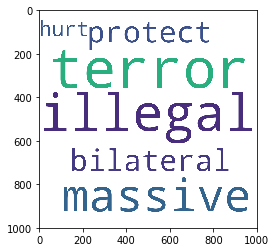

In [55]:
from PIL import Image
from wordcloud import WordCloud

import matplotlib.pyplot as plt

wc = WordCloud(background_color="white",width=1000,height=1000, max_words=10,relative_scaling=0.5,normalize_plurals=False).generate_from_frequencies(kw_counted)
plt.imshow(wc)

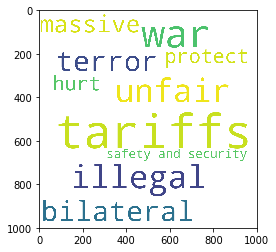

In [57]:
#2018
wc = WordCloud(background_color="white",width=1000,height=1000, max_words=10,relative_scaling=0.5,normalize_plurals=False).generate_from_frequencies(kw_counted)
plt.imshow(wc)

In [74]:
df_trump_m = pd.read_csv('D:\\FuturesGroup\\Contextuality\\Trump_MAGA.csv')
df_trump_m['low text'] = df_trump_m['text'].str.lower()
df_trump_m['year'] = df_trump_m['created_at'].str[6:10]
df_trump_m2017 = df_trump_m[df_trump_m['year'] == '2017']
df_trump_m2018 = df_trump_m[df_trump_m['year'] == '2018']
len(df_trump_m2017) , len(df_trump_m2018)

(101, 75)

In [61]:
kw_counted = {}
for k in keywords:
    cnt = 0
    for index, row in df_trump2017.iterrows():
         if k in row['low text']:
                if k in kw_counted:
                    kw_counted[k] += 1
                else:
                    kw_counted[k] = 1

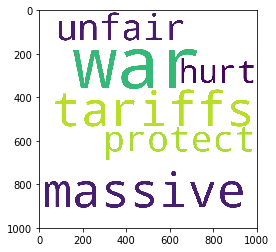

In [60]:
# 2018
wc = WordCloud(background_color="white",width=1000,height=1000, max_words=10,relative_scaling=0.5,normalize_plurals=False).generate_from_frequencies(kw_counted)
plt.imshow(wc)

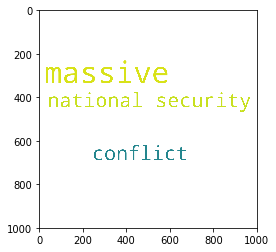

In [62]:
#2017
wc = WordCloud(background_color="white",width=1000,height=1000, max_words=10,relative_scaling=0.5,normalize_plurals=False).generate_from_frequencies(kw_counted)
plt.imshow(wc)

 # Combine 2017 and 2018 for trades and MAGA

In [76]:
df_2017 = pd.concat([df_trump2017, df_trump_m2017])

In [77]:
len(df_2017)

167

In [78]:
df_2018 = pd.concat([df_trump2018, df_trump_m2018])
len(df_2018)

175

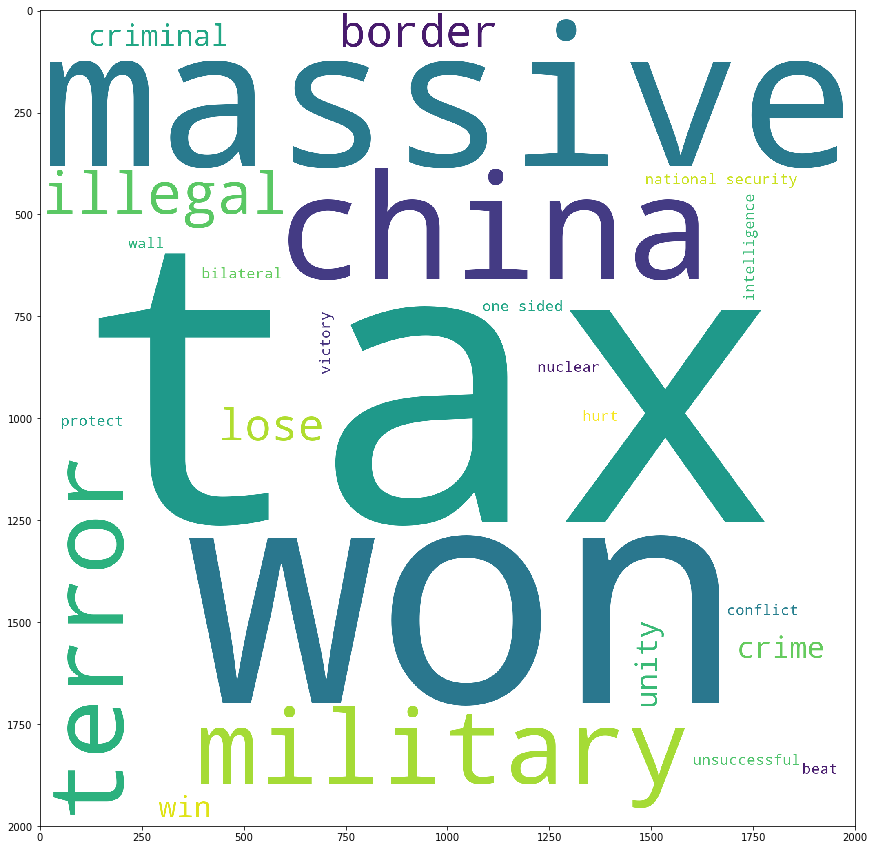

In [88]:
# 2017

kw_counted = {}
for k in keywords:
    cnt = 0
    for index, row in df_2017.iterrows():
         if k in row['low text']:
                if k in kw_counted:
                    kw_counted[k] += 1
                else:
                    kw_counted[k] = 1


wc = WordCloud(background_color="white",width=2000,height=2000, max_words=40,relative_scaling=1,normalize_plurals=False).generate_from_frequencies(kw_counted)
plt.figure( figsize=(15,15) )
plt.imshow(wc)

In [80]:
kw_counted

{'china': 5,
 'military': 4,
 'victory': 1,
 'beat': 1,
 'crime': 2,
 'border': 3,
 'terror': 4,
 'illegal': 4,
 'national security': 1,
 'protect': 1,
 'conflict': 1,
 'bilateral': 1,
 'criminal': 2,
 'tax': 9,
 'massive': 6,
 'hurt': 1,
 'intelligence': 1,
 'unsuccessful': 1,
 'unity': 2,
 'wall': 1,
 'nuclear': 1,
 'win': 2,
 'won': 7,
 'lose': 3,
 'one sided': 1}

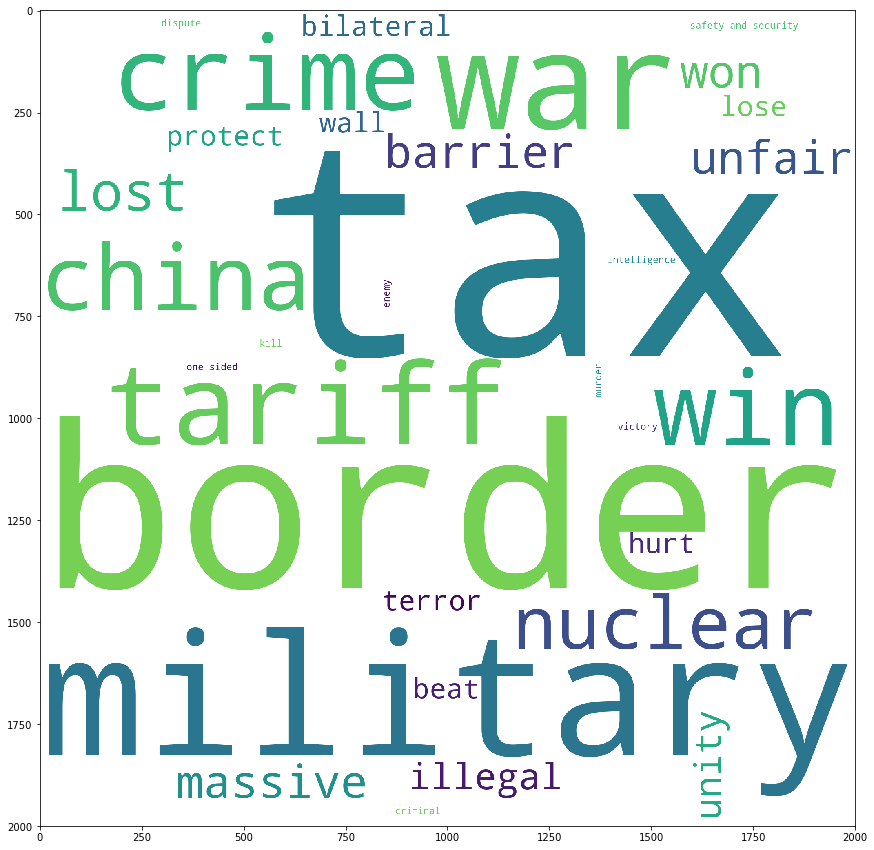

In [87]:
# 2018

kw_counted8 = {}
for k in keywords:
    cnt = 0
    for index, row in df_2018.iterrows():
         if k in row['low text']:
                if k in kw_counted8:
                    kw_counted8[k] += 1
                else:
                    kw_counted8[k] = 1


wc = WordCloud(background_color="white",width=2000,height=2000, max_words=40,relative_scaling=1,normalize_plurals=False).generate_from_frequencies(kw_counted8)
plt.figure( figsize=(15,15) )

plt.imshow(wc)

In [84]:
kw_counted8

{'china': 10,
 'military': 15,
 'victory': 1,
 'beat': 3,
 'crime': 11,
 'border': 16,
 'terror': 3,
 'illegal': 4,
 'safety and security': 1,
 'protect': 3,
 'unfair': 5,
 'war': 12,
 'dispute': 1,
 'bilateral': 3,
 'criminal': 1,
 'tariff': 12,
 'tax': 18,
 'massive': 5,
 'hurt': 3,
 'intelligence': 1,
 'kill': 1,
 'enemy': 1,
 'unity': 4,
 'wall': 3,
 'nuclear': 8,
 'murder': 1,
 'win': 11,
 'won': 5,
 'lose': 3,
 'lost': 6,
 'barrier': 5,
 'one sided': 1}

In [89]:
len(kw_counted), len(kw_counted8)

(25, 32)